In [78]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kelumrubasin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [79]:
# Authentication
consumerKey = "L45cVwt1PcimfFnycMhQEHRsg"
consumerSecret = "a2f3dr6xHHukbCzlvzK5j0mDYg3di3aN8EfixXOhzV9dbhMk1F"
accessToken = "1533339797187883008-A5uEjCSsKsH4OBeTaO8g0vHaqoI8h6"
accessTokenSecret = "UKvwBMeTRN6p4f2ogcrQAQT52Fi6eWUhe2pCnEkaJ8UGq"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [80]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

number_of_tweets = 200
twitter_username = "Prime_Lands"
display_name = "Prime Lands"

tweets = tweepy.Cursor(api.user_timeline, screen_name = twitter_username, tweet_mode = "extended").items(number_of_tweets)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.full_text)
    analysis = TextBlob(tweet.full_text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.full_text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.full_text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.full_text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.full_text)
        neutral += 1

positive = percentage(positive, number_of_tweets)
negative = percentage(negative, number_of_tweets)
neutral = percentage(neutral, number_of_tweets)
polarity = percentage(polarity, number_of_tweets)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [81]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  126
positive number:  54
negative number:  1
neutral number:  71


In [82]:
tweet_list

,0
0,https://t.co/Zb8g96sZGJ
1,https://t.co/bgTN3ieobk
2,The Land Located At Nawagamuwa Kaduwela..\nEa...
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000..."
...,...
121,"@gagani_n Hi, Yes we can help you."
122,@gagani_n Thanks for your inquiry. We have lot...
123,"ඔබේ ගෙදර ලස්සන කරගන්න, ඒ වගේම යාළුවන්ගෙත්, ඔ..."
124,"Hey, This is one of our ongoing project. For m..."


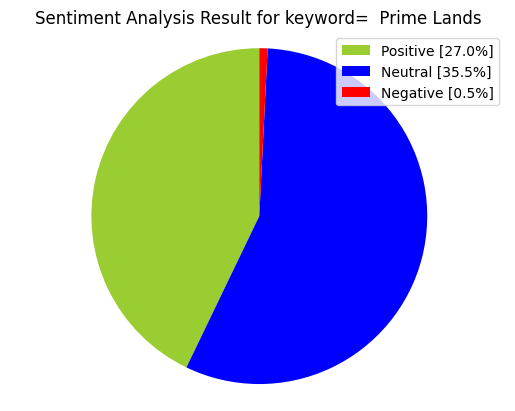

In [83]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+display_name+"" )
plt.axis('equal')
plt.show()

In [84]:
tweet_list.drop_duplicates(inplace = True)

In [85]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,https://t.co/Zb8g96sZGJ,https://t.co/Zb8g96sZGJ
1,https://t.co/bgTN3ieobk,https://t.co/bgTN3ieobk
2,The Land Located At Nawagamuwa Kaduwela..\nEa...,The Land Located At Nawagamuwa Kaduwela..\nEa...
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000...","Prime Tranquility Gardens Kelaniya\n1P:225,000..."
...,...,...
121,"@gagani_n Hi, Yes we can help you.","@gagani_n Hi, Yes we can help you."
122,@gagani_n Thanks for your inquiry. We have lot...,@gagani_n Thanks for your inquiry. We have lot...
123,"ඔබේ ගෙදර ලස්සන කරගන්න, ඒ වගේම යාළුවන්ගෙත්, ඔ...","ඔබේ ගෙදර ලස්සන කරගන්න, ඒ වගේම යාළුවන්ගෙත්, ඔ..."
124,"Hey, This is one of our ongoing project. For m...","Hey, This is one of our ongoing project. For m..."


In [86]:
tweet_list

,0,text
0,https://t.co/Zb8g96sZGJ,https://t.co/Zb8g96sZGJ
1,https://t.co/bgTN3ieobk,https://t.co/bgTN3ieobk
2,The Land Located At Nawagamuwa Kaduwela..\nEa...,The Land Located At Nawagamuwa Kaduwela..\nEa...
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000...","Prime Tranquility Gardens Kelaniya\n1P:225,000..."
...,...,...
121,"@gagani_n Hi, Yes we can help you.","@gagani_n Hi, Yes we can help you."
122,@gagani_n Thanks for your inquiry. We have lot...,@gagani_n Thanks for your inquiry. We have lot...
123,"ඔබේ ගෙදර ලස්සන කරගන්න, ඒ වගේම යාළුවන්ගෙත්, ඔ...","ඔබේ ගෙදර ලස්සන කරගන්න, ඒ වගේම යාළුවන්ගෙත්, ඔ..."
124,"Hey, This is one of our ongoing project. For m...","Hey, This is one of our ongoing project. For m..."


In [87]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,https://t.co/Zb8g96sZGJ,
1,https://t.co/bgTN3ieobk,
2,The Land Located At Nawagamuwa Kaduwela..\nEa...,the land located at nawagamuwa kaduwela eas...
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...,...
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000...",prime tranquility gardens kelaniya 1p 225 000 ...
5,"Prime Wisdom Square Akuressa\n1P: 225,000 LKR ...",prime wisdom square akuressa 1p 225 000 lkr u...
6,https://t.co/Zd84n4exyY,
7,"A land located in Wellampitiya, In a calm and ...",a land located in wellampitiya in a calm and ...
8,"Land Located @ Wattala Elakanda\n1P: 425,000 L...",land located wattala elakanda 1p 425 000 lk...
9,"Mark of Prime Galle\n1P: 375,000 LKR Upwards ...",mark of prime galle 1p 375 000 lkr upwards ...


In [88]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,https://t.co/Zb8g96sZGJ,,0.0,0.000000,neutral,0.0,0.000,0.000,0.0000
1,https://t.co/bgTN3ieobk,,0.0,0.000000,neutral,0.0,0.000,0.000,0.0000
2,The Land Located At Nawagamuwa Kaduwela..\nEa...,the land located at nawagamuwa kaduwela eas...,0.3,0.583333,positive,0.0,0.828,0.172,0.4404
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...,...,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000...",prime tranquility gardens kelaniya 1p 225 000 ...,0.0,0.000000,positive,0.0,0.843,0.157,0.4215
5,"Prime Wisdom Square Akuressa\n1P: 225,000 LKR ...",prime wisdom square akuressa 1p 225 000 lkr u...,0.3,0.500000,positive,0.0,0.711,0.289,0.6908
6,https://t.co/Zd84n4exyY,,0.0,0.000000,neutral,0.0,0.000,0.000,0.0000
7,"A land located in Wellampitiya, In a calm and ...",a land located in wellampitiya in a calm and ...,0.3,0.750000,positive,0.0,0.839,0.161,0.3182
8,"Land Located @ Wattala Elakanda\n1P: 425,000 L...",land located wattala elakanda 1p 425 000 lk...,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
9,"Mark of Prime Galle\n1P: 375,000 LKR Upwards ...",mark of prime galle 1p 375 000 lkr upwards ...,0.3,0.500000,positive,0.0,0.874,0.126,0.3182


In [89]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [90]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [91]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,66,52.38
neutral,59,46.83
negative,1,0.79


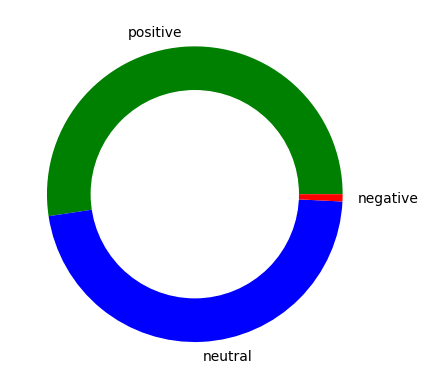

In [92]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [93]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

    

Word Cloud Saved Successfully


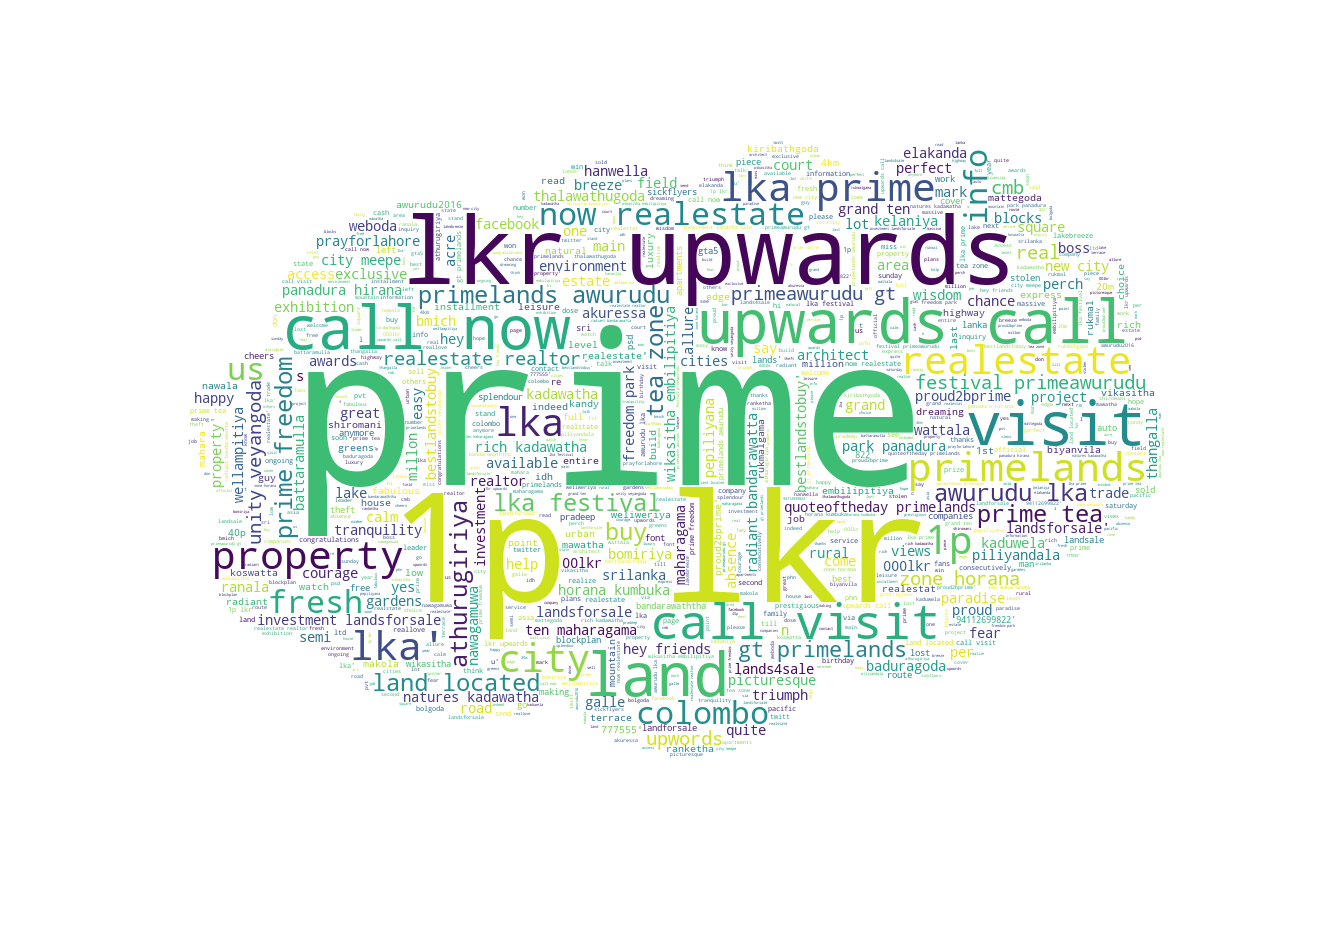

In [94]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


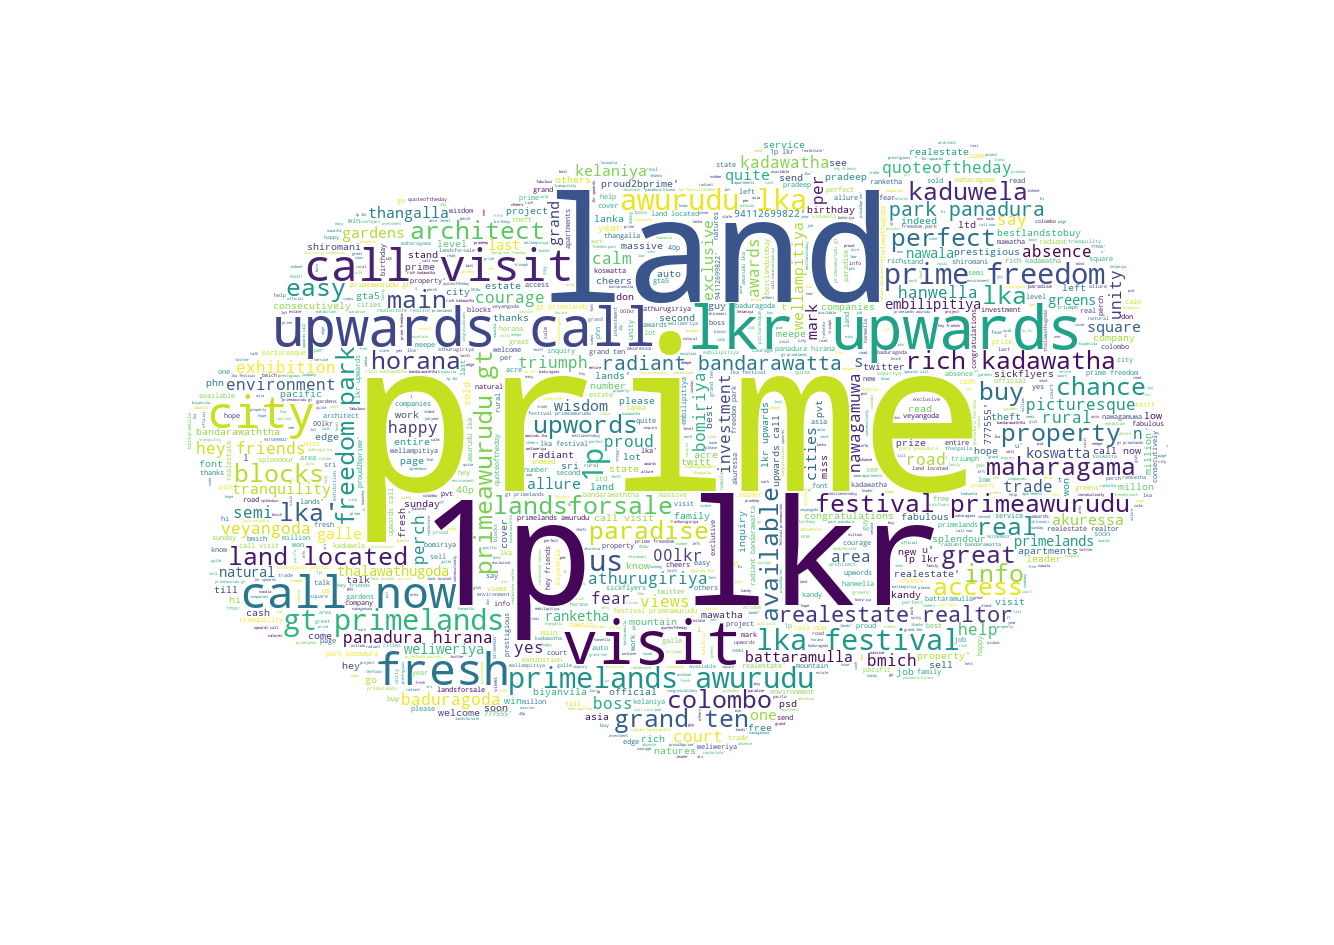

In [95]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


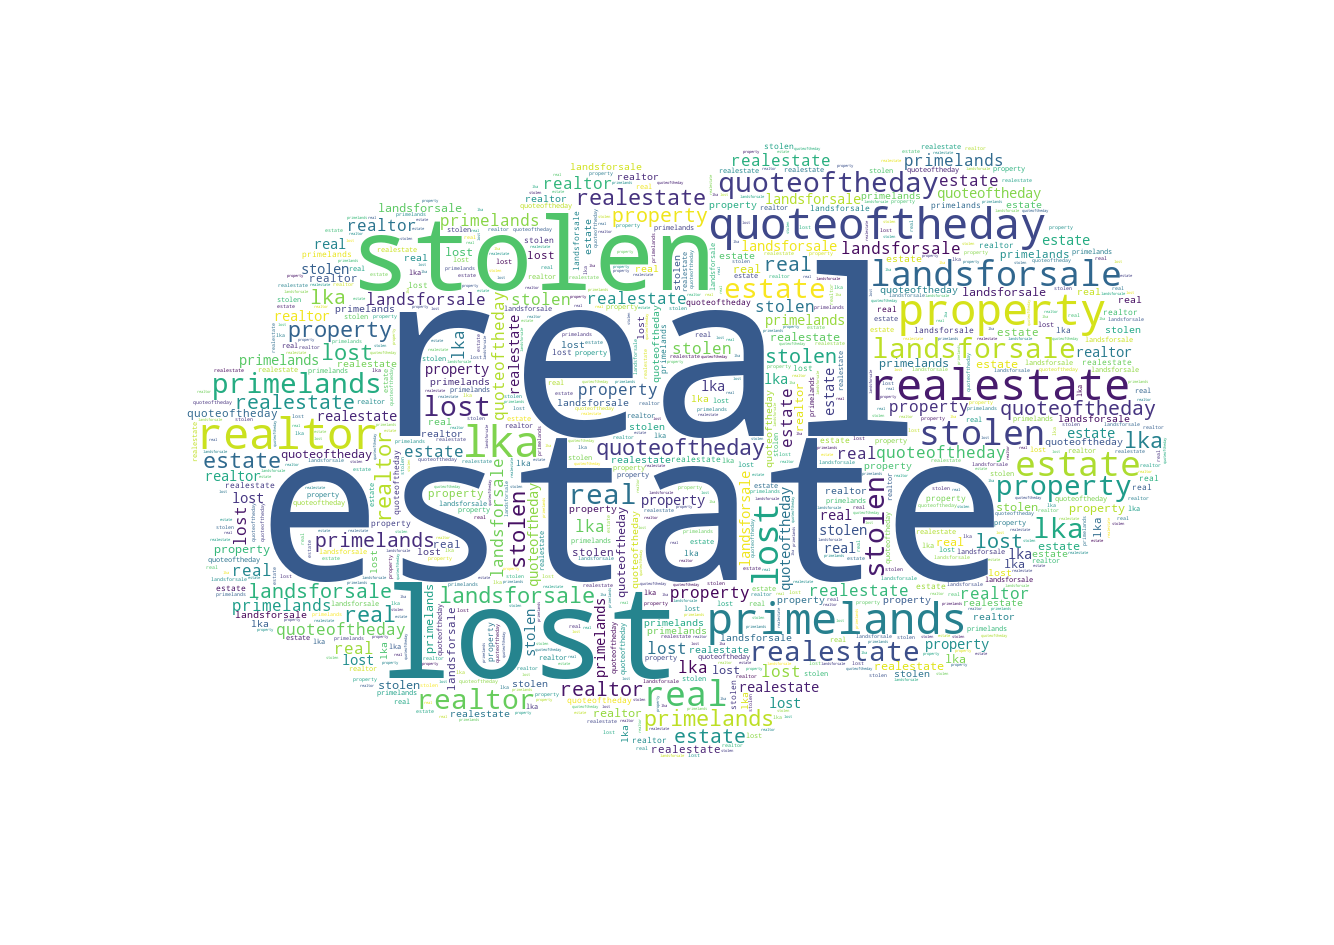

In [96]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


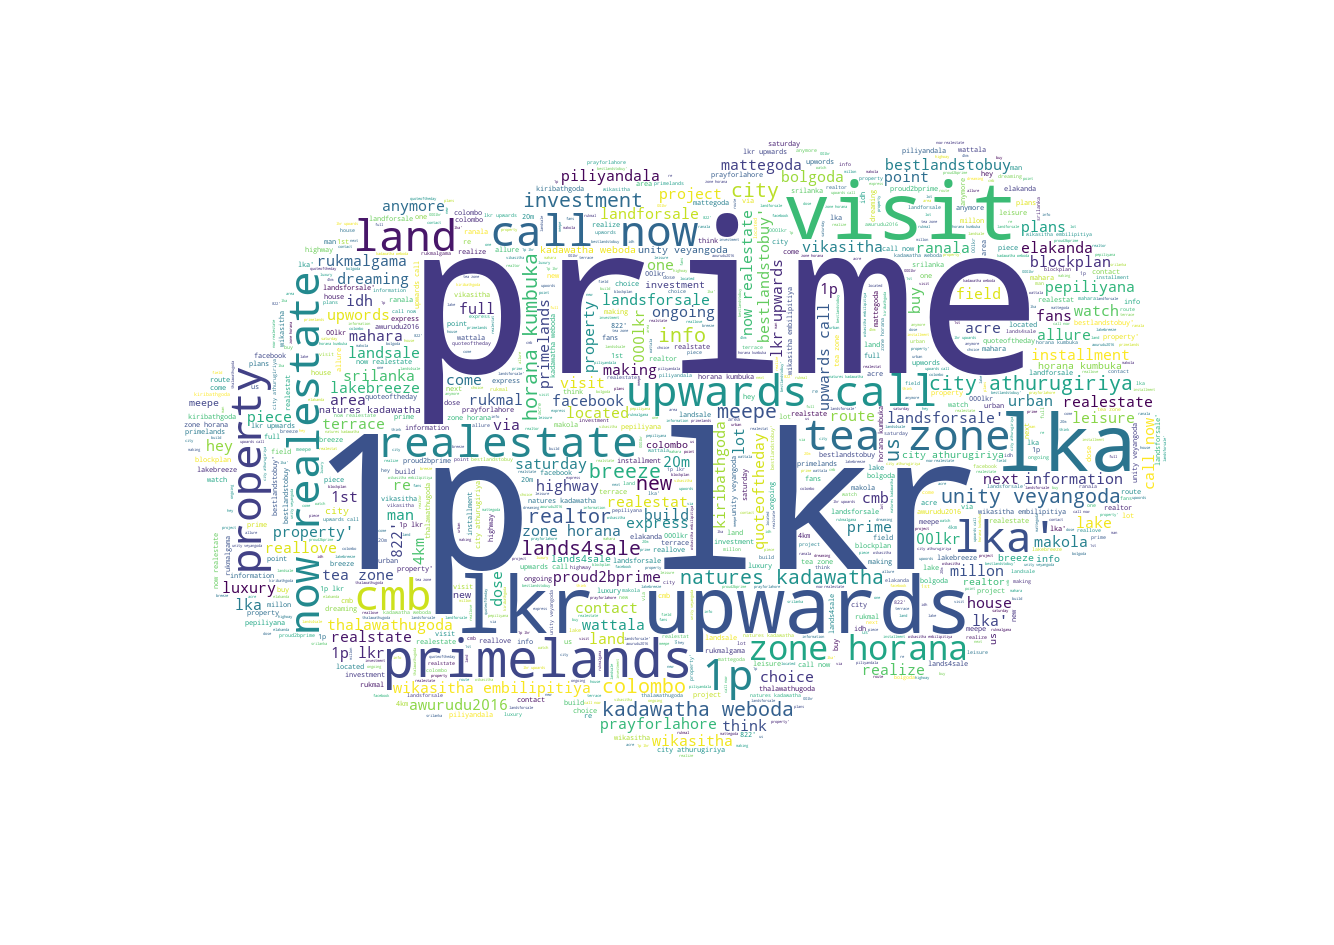

In [97]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [98]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [99]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,116.00
neutral,94.07
positive,96.70


In [100]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.00
neutral,12.59
positive,14.91


In [101]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [102]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [103]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [104]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))


In [105]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [106]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,https://t.co/Zb8g96sZGJ,,0.0,0.000000,neutral,0.0,0.000,0.000,0.0000,1,0,,"[, ]","[, ]","[, ]"
1,https://t.co/bgTN3ieobk,,0.0,0.000000,neutral,0.0,0.000,0.000,0.0000,1,0,,"[, ]","[, ]","[, ]"
2,The Land Located At Nawagamuwa Kaduwela..\nEa...,the land located at nawagamuwa kaduwela eas...,0.3,0.583333,positive,0.0,0.828,0.172,0.4404,94,15,the land located at nawagamuwa kaduwela eas...,"[the, land, located, at, nawagamuwa, kaduwela,...","[land, located, nawagamuwa, kaduwela, easy, ac...","[land, locat, nawagamuwa, kaduwela, easi, acce..."
3,ඇස් වහක් කටවහක් නෑ හැම අතින්ම සුබයි නවගමුව ...,...,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000,96,8,...,"[, call, visit, srilanka, lka, ]","[, call, visit, srilanka, lka, ]","[, call, visit, srilanka, lka, ]"
4,"Prime Tranquility Gardens Kelaniya\n1P:225,000...",prime tranquility gardens kelaniya 1p 225 000 ...,0.0,0.000000,positive,0.0,0.843,0.157,0.4215,95,16,prime tranquility gardens kelaniya p lkr upw...,"[prime, tranquility, gardens, kelaniya, p, lkr...","[prime, tranquility, gardens, kelaniya, p, lkr...","[prime, tranquil, garden, kelaniya, p, lkr, up..."


In [107]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

126 Number of reviews has 271 words


In [108]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,absenc,access,acr,akuressa,allur,also,anymor,apart,architect,...,welcom,weliweriya,wellampitiya,wikasitha,win,wisdom,work,ye,year,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
prime,88
call,67
p,64
lkr,59
upward,52
lka,51
visit,49
land,37
primeland,35
realest,27


In [110]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [111]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('lkr upwards', 42),
 ('upwards 94', 34),
 ('000 lkr', 31),
 ('94 112', 29),
 ('699 822', 25),
 ('112 699', 24),
 ('00 lkr', 19),
 ('000 00', 15),
 ('upwards visit', 12),
 ('prime city', 10),
 ('822 realestate', 9),
 ('822 visit', 8),
 ('1p 295', 8),
 ('primelands realestate', 8),
 ('realestate lka', 8),
 ('94 713', 7),
 ('295 000', 7),
 ('primelands awurudu', 7),
 ('awurudu lka', 7),
 ('lka festival', 7)]

In [112]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('lkr upwards 94', 28),
 ('000 lkr upwards', 26),
 ('upwards 94 112', 25),
 ('94 112 699', 24),
 ('112 699 822', 24),
 ('000 00 lkr', 15),
 ('00 lkr upwards', 14),
 ('lkr upwards visit', 11),
 ('699 822 realestate', 9),
 ('699 822 visit', 8),
 ('upwards 94 713', 7),
 ('1p 295 000', 7),
 ('primelands awurudu lka', 7),
 ('awurudu lka festival', 7),
 ('prime tea zone', 6),
 ('1p 85 000', 6),
 ('gt primelands awurudu', 6),
 ('lka festival primeawurudu', 6),
 ('upwards visit 94', 6),
 ('1p 375 000', 5)]